# Exploring HR data for Analytics

# Purpose

Predict how many years employees would stay with the company

# Importing library

In [1]:
#Importing libraries.
library(dplyr)
library(tidyr)
library(ggplot2)
library(pls)
library(corrplot)
library(tree)
library(randomForest)
library(glmnet)
library (e1071)
library(Metrics)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


corrplot 0.92 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:pls’:

    corrplot


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




# Importing data

In [2]:
#Loading the Hr dataset.
HR=read.csv("../input/hr-data-for-analytics/HR_comma_sep.csv")

# Total number of column and width

In [3]:
#Displaying the HR dataset's features.
dim(HR)

[1] 14999    10

# Types of Data

In [4]:
#Checking the features of the dataset.
str(HR)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : chr  "sales" "sales" "sales" "sales" ...
 $ salary               : chr  "low" "medium" "medium" "low" ...


# Renaming column

In [5]:
#Renaming the features of the dataset.
HR=rename(HR,department=sales)

# Converting Data

In [6]:
#Converting the dataset features.
HR$department=factor(HR$department,levels=sort(unique(HR$department)))

HR$Work_accident=factor(HR$Work_accident,levels=sort(unique(HR$Work_accident)))

HR$promotion_last_5years=factor(HR$promotion_last_5years,levels=sort(unique(HR$promotion_last_5years)))

HR$salary=factor(HR$salary,levels=sort(unique(HR$salary)))

HR$time_spend_company=as.numeric(HR$time_spend_company)
HR$number_project=as.numeric(HR$number_project)
HR$average_montly_hours=as.numeric(HR$average_montly_hours)
str(HR)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : num  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : num  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : num  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ department           : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


# Checking missing

In [7]:
#Checking the dataset for missing features.
sum(is.na(HR$satisfaction_level))
sum(is.na(HR$last_evaluation))
sum(is.na(HR$number_project))
sum(is.na(HR$average_montly_hours))
sum(is.na(HR$time_spend_company))
sum(is.na(HR$Work_accident))
sum(is.na(HR$left))
sum(is.na(HR$promotion_last_5years))
sum(is.na(HR$department))
sum(is.na(HR$Salary))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

From the above graph, there is no missing values.

# Check for Normality

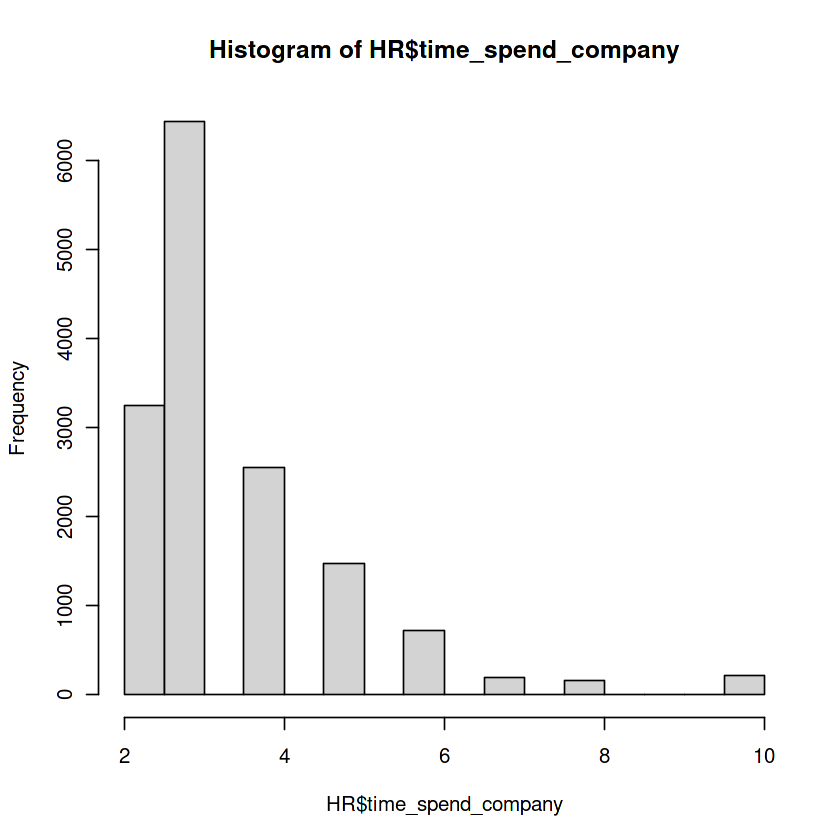

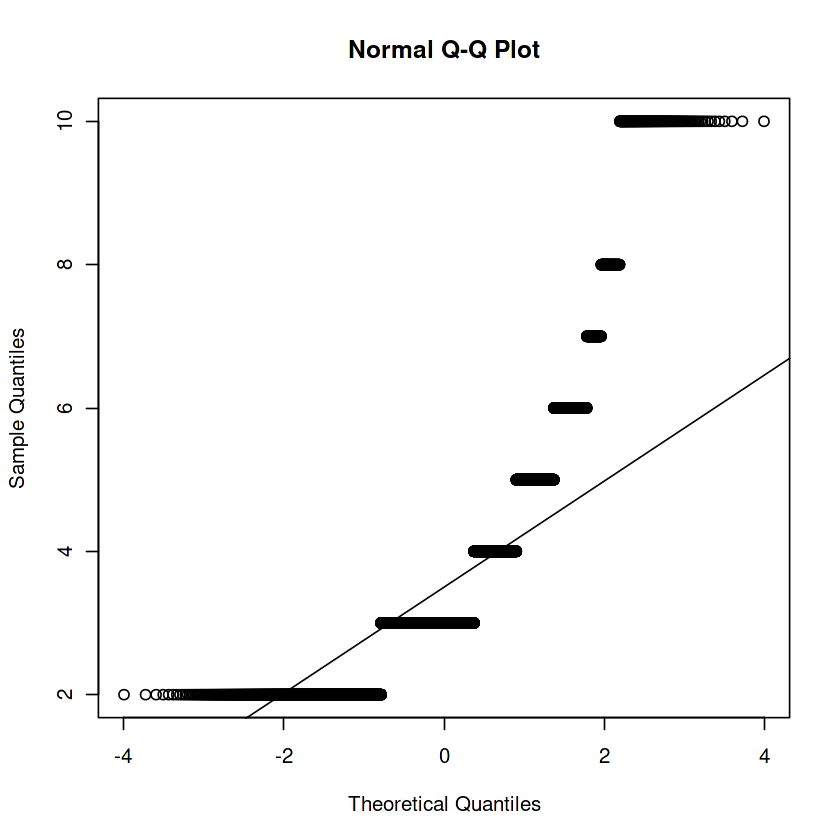

In [8]:
#Checking the normality of the time spend company feature.

hist(HR$time_spend_company)

#If the data is normally distributed, the points in a Q-Q plot will be on a straight diagonal line
qqnorm(HR$time_spend_company)
qqline(HR$time_spend_company)

From the above results, the response variable time_spend_company doesn't follow the normality. 

# Find correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.00000000,0.1050212,-0.1429696,-0.02004811,-0.1008661
last_evaluation,0.10502121,1.0000000,0.3493326,0.33974180,0.1315907
number_project,-0.14296959,0.3493326,1.0000000,0.41721063,0.1967859
average_montly_hours,-0.02004811,0.3397418,0.4172106,1.00000000,0.1277549
time_spend_company,-0.10086607,0.1315907,0.1967859,0.12775491,1.0000000


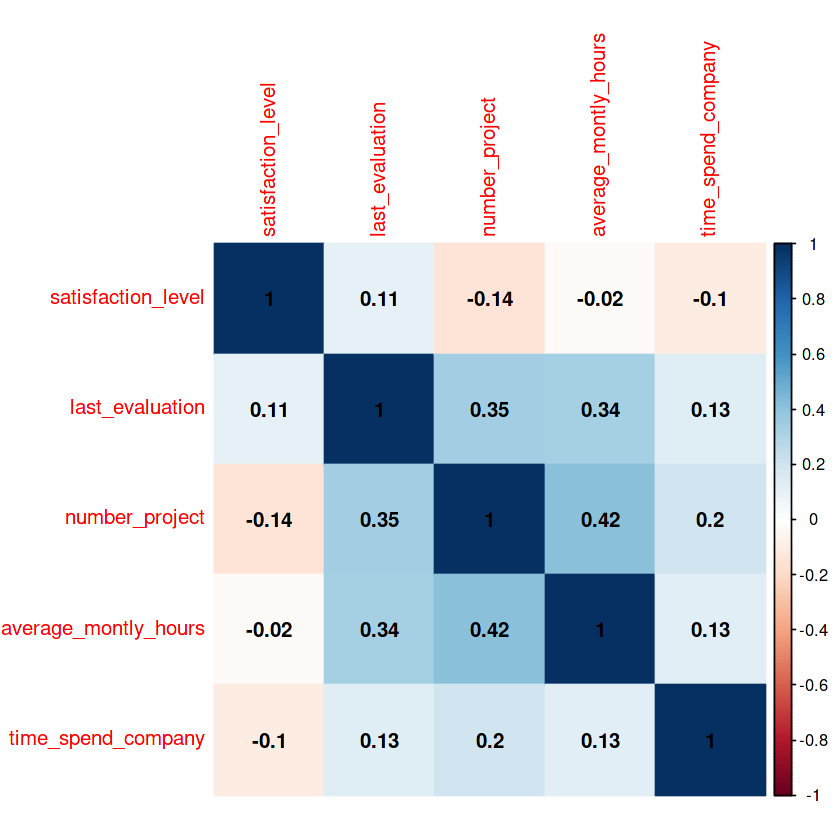

In [9]:
#Displaying and plotting the correlation of the HR dataset.
HR_corr=HR%>%
  select(satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company)
M=cor(HR_corr)
M
corrplot(M,method='color',addCoef.col = 1)

# Explanatory Data Analytics

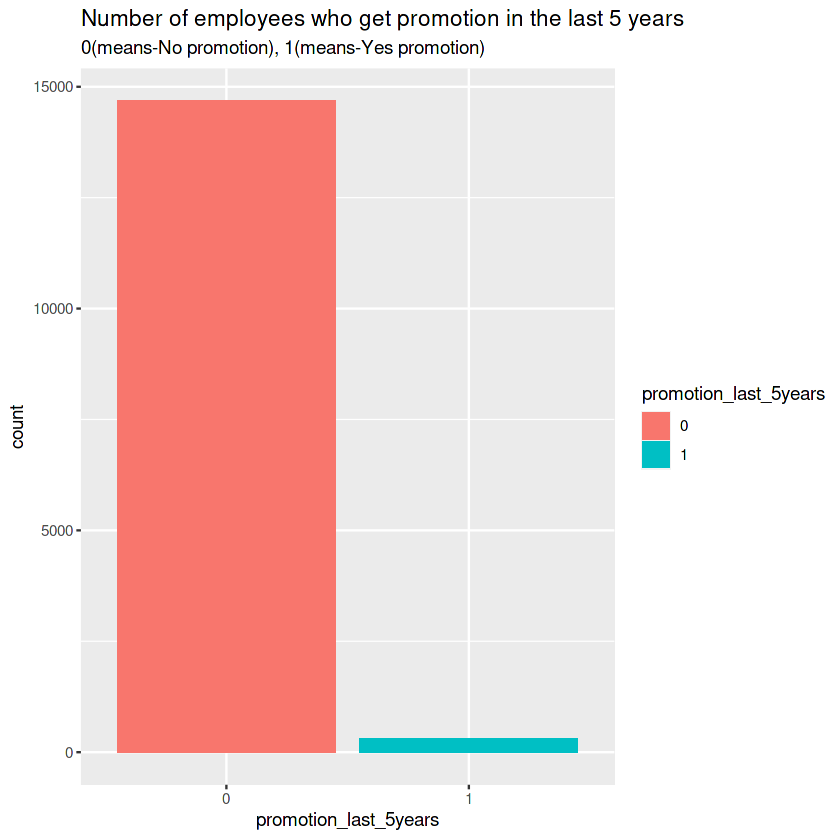

In [10]:
# Number of employees who get promotion in the last 5 years
ggplot(data=HR)+geom_bar(mapping=aes(x=promotion_last_5years,fill=promotion_last_5years))+
  labs(title="Number of employees who get promotion in the last 5 years",subtitle="0(means-No promotion), 1(means-Yes promotion)")

From the above graph, many employees are not getting enough promotion in the last 5 years.

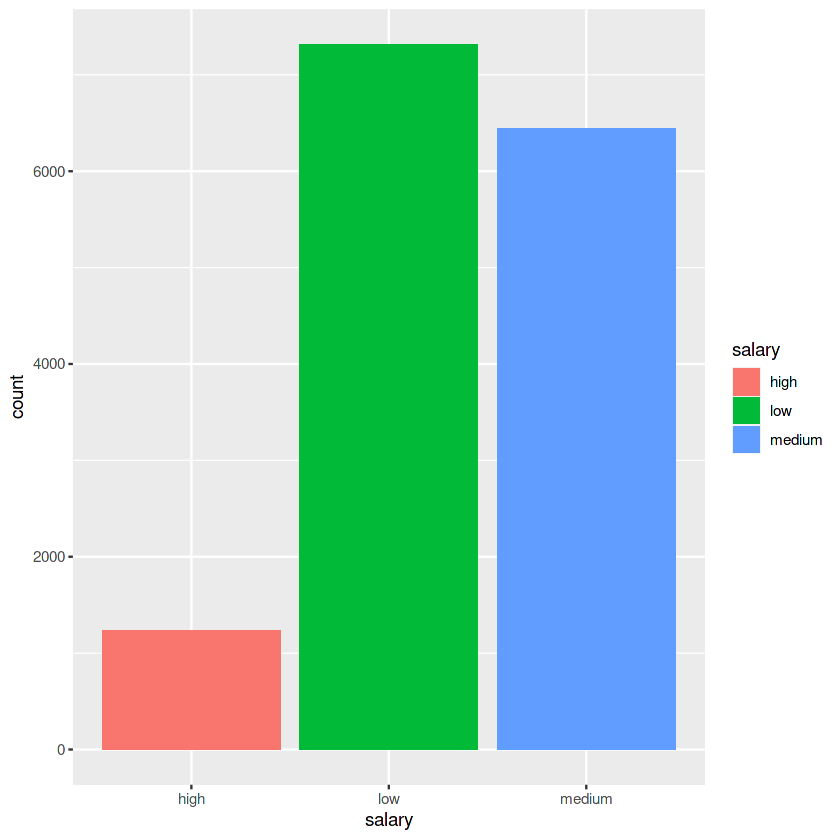

In [11]:
#Salary
ggplot(data=HR)+geom_bar(mapping=aes(x=salary,fill=salary))

From the above graph, many employees are getting low in salary. Only a small percentage of employees get a high salary.

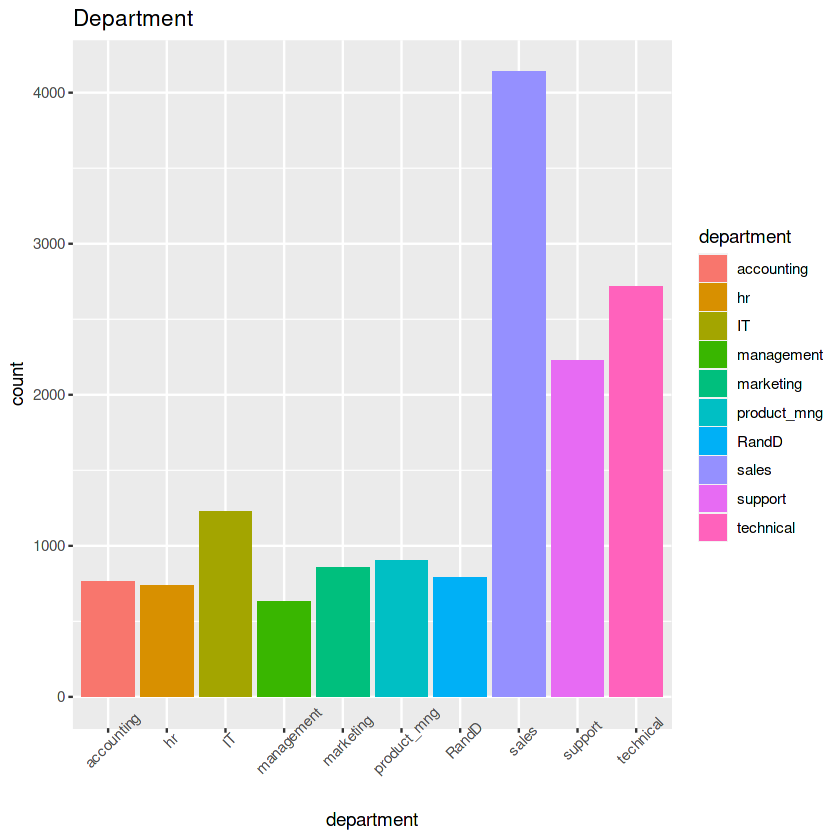

In [12]:
# Number of employees in each Department
ggplot(data=HR)+geom_bar(mapping=aes(x=department,fill=department))+
   theme(axis.text.x=element_text(angle=45))+
  labs(title="Department")

From the above graph, accounting department have more employees.

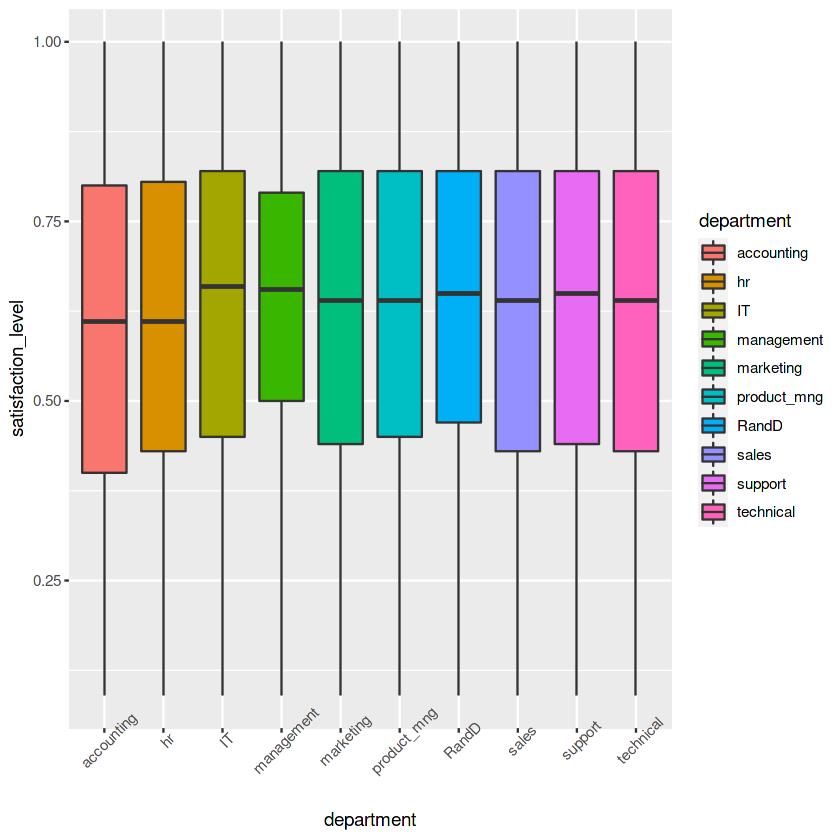

In [13]:
# Satisfaction level by Department
ggplot(data=HR)+geom_boxplot(mapping=aes(x=department,y=satisfaction_level,fill=department))+
  theme(axis.text.x=element_text(angle=45))

The above graph is not clear to show which department have the highest and lowest satisfaction level.

In [14]:
# Average satisfaction level by Department
HR_Department=HR %>% group_by(department) %>%
  summarize(average_satisfication_level=mean(satisfaction_level)) %>%
  arrange(desc(average_satisfication_level))
HR_Department

department,average_satisfication_level
<fct>,<dbl>
management,0.6213492
RandD,0.6198221
product_mng,0.6196341
marketing,0.6186014
support,0.6182997
IT,0.6181418
sales,0.6144469
technical,0.6078971
hr,0.5988092


On average, management department has the highest employees satisfaction level and accouting department has the lowest employees satisfaction level.

# Employees in which department stay longer with the company

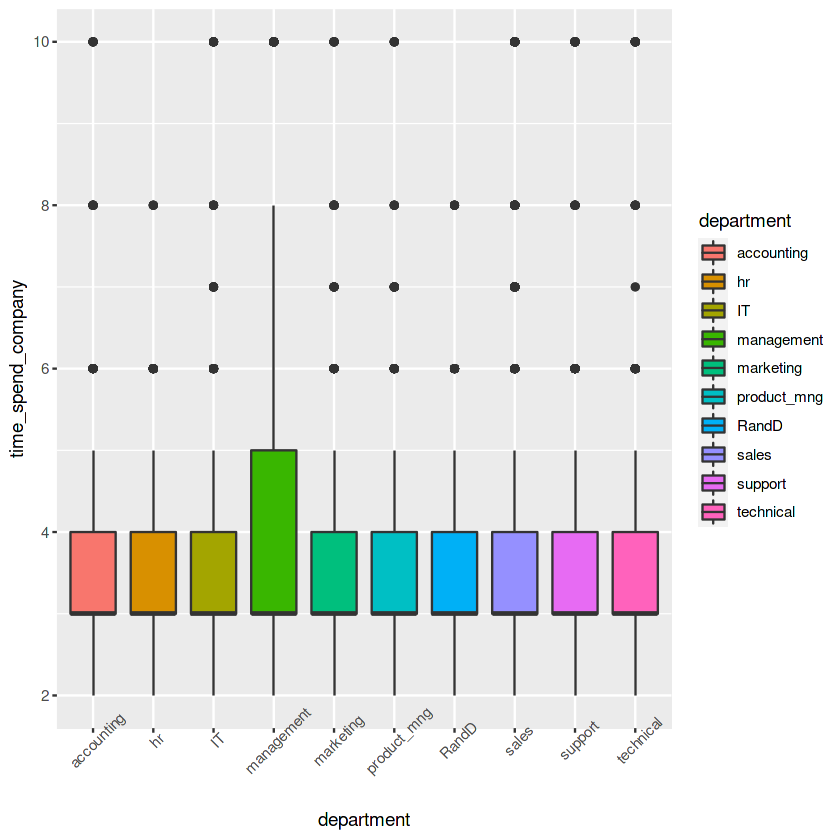

In [15]:
#Plotting the employees who stayed longer in specific departments within the company. 
ggplot(data=HR)+geom_boxplot(mapping=aes(x=department,y=time_spend_company,fill=department))+
  theme(axis.text.x=element_text(angle=45))

Employees from management department stay longer with the company.

Employees from HR department stay less time with the company.

# Creating Training and Testing Data

In [16]:
#Constructing a testing and training datasets.
train = sample(dim(HR)[1], dim(HR)[1]*0.8)
test=-train
HR.test=HR[test,]
HR.train=HR[train,]

#80% of the origial data is training and 20% of the original data is testing data.

# Linear Regression

* Use the linear regression model to predict the length of the employment(variables: time_spend_company). 
* It tells me which predictors in a model are statistically significant or not by providing the p-value.
* However, it can cause underfitting if the assumption between the response and predictors are non-linear. 

In [17]:
#Fit a Linear Regression on the training set.
lm.fit=lm(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department,data=HR.train)
summary(lm.fit)
lm.pred=predict(lm.fit,HR.test)
summary(lm.pred)
mean((lm.pred-HR.test$time_spend_company)^2) #test MSE
RMSE_Linear=sqrt(mean((lm.pred-HR.test$time_spend_company)^2)) #RMSE
RMSE_Linear
# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,lm.pred)


Call:
lm(formula = time_spend_company ~ satisfaction_level + last_evaluation + 
    number_project + average_montly_hours + Work_accident + promotion_last_5years + 
    salary + department, data = HR.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8524 -0.8477 -0.2558  0.4951  7.1589 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.587805   0.101905  25.394  < 2e-16 ***
satisfaction_level     -0.523420   0.053668  -9.753  < 2e-16 ***
last_evaluation         0.682203   0.083770   8.144 4.21e-16 ***
number_project          0.167484   0.012075  13.870  < 2e-16 ***
average_montly_hours    0.001017   0.000292   3.483 0.000497 ***
Work_accident1          0.036715   0.036788   0.998 0.318287    
promotion_last_5years1  0.521019   0.092729   5.619 1.97e-08 ***
salarylow              -0.149794   0.049595  -3.020 0.002530 ** 
salarymedium           -0.070675   0.049818  -1.419 0.156024    
departmenthr           -0.107541 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.738   3.207   3.444   3.497   3.685   5.327 

[1] 1.924627

[1] 1.387309

[1] 1.387309

Our prediction is 1.45 years away from the test value.

# Ridge Regression

* Use Ridge Regression to predict the length of the employment(variables: time_spend_company). 
* Ridge Regression is used for minimizing RSS. 
* Minimizing RSS will lead to better prediction accuracy by introducing the shrinkage penalty. 
* Shrinkage penalty shrinks the coefficient estimates towards approximately zero. 

In [18]:
#Fit the Ridge Regression on the training set
train.mat<-model.matrix(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department,data=HR.train)

test.mat<-model.matrix(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department,data=HR.test)

grid<-10^seq(10,-2,length=100)

ridge.fit<-glmnet(train.mat,HR.train$time_spend_company,alpha=0,lambda=grid)

# Use a cross validation to see which lambda gives the smallest MSE
cv.out<-cv.glmnet(train.mat,HR.train$time_spend_company,alpha=0)

bestlam<-cv.out$lambda.min

bestlam

ridge.pred<-predict(ridge.fit,s=bestlam,newx=test.mat)
mean((ridge.pred-HR.test$time_spend_company)^2) #MSE
RMSE_Ridge=sqrt(mean((ridge.pred-HR.test$time_spend_company)^2)) #RMSE
RMSE_Ridge

# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,ridge.pred)

[1] 0.07233421

[1] 1.924889

[1] 1.387404

[1] 1.387404

Our prediction is 1.45 years away from the test value.

# Lasso Regression

* Use Lasso Regression to predict the length of the employment(variables: time_spend_company). 
* Lasso Regression is similar to ridge regression. 
* Lasso is considered to be a sparse regression model because it shrinks the coefficient estimates towards zero and only a small number are non-zero.
Advantages of using Lasso Regression
* It solves the overfitting issue using the Linear Models.
* It works well with large number of features.

In [19]:
#Fit a Lasso Regression on the training set.
train.mat<-model.matrix(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department,data=HR.train)

test.mat<-model.matrix(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department,data=HR.test)

grid<-10^seq(10,-5,length=100)

lasso.fit<-glmnet(train.mat,HR.train$time_spend_company,alpha=1,lambda=grid)
#use cross validation to figure out which lambda value gives smallest MSE.
cv.out<-cv.glmnet(train.mat,HR.train$time_spend_company,alpha=1)
bestlam<-cv.out$lambda.min
#lambda value that gives the smallest MSE
bestlam

lasso.pred<-predict(lasso.fit,s=bestlam,newx=test.mat)
mean((lasso.pred-HR.test$time_spend_company)^2) #MSE
RMSE_Lasso=sqrt(mean((lasso.pred-HR.test$time_spend_company)^2)) #RMSE
RMSE_Lasso

# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,lasso.pred)

[1] 0.003951095

[1] 1.925187

[1] 1.387511

[1] 1.387511

Our prediction is 1.45 years away from the test value.

# Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?


Regression tree:
tree(formula = time_spend_company ~ satisfaction_level + last_evaluation + 
    number_project + average_montly_hours + Work_accident + promotion_last_5years + 
    salary + department, data = HR.train)
Variables actually used in tree construction:
[1] "satisfaction_level"   "last_evaluation"      "department"          
[4] "average_montly_hours" "number_project"      
Number of terminal nodes:  7 
Residual mean deviance:  1.887 = 22620 / 11990 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5610 -1.1850 -0.1849  0.0000  0.4388  6.8150 

[1] 1.363701

[1] 1.363701

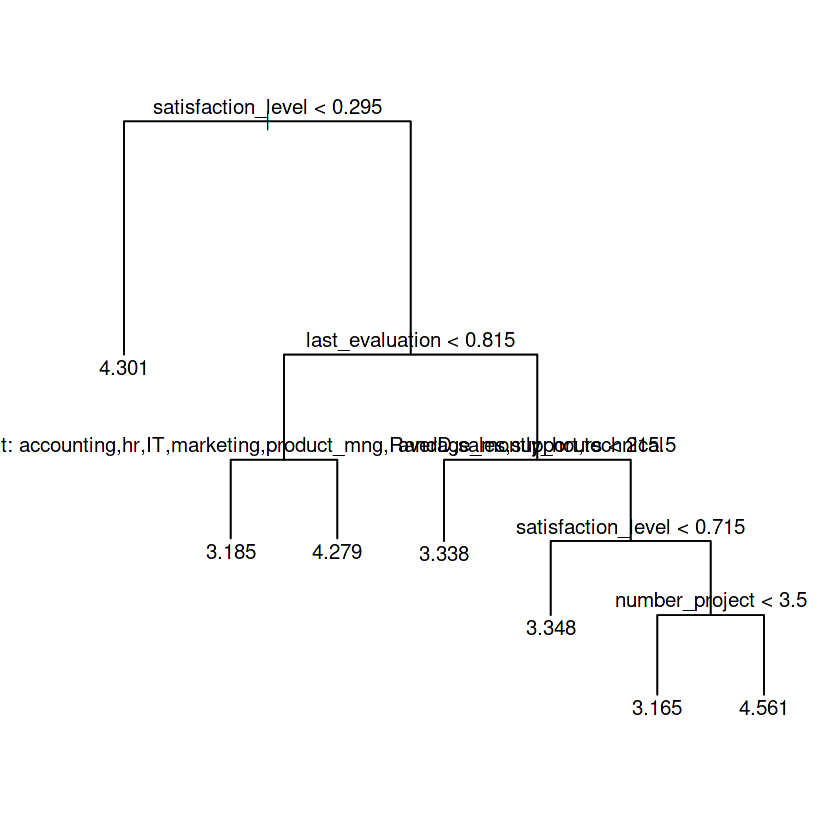

In [20]:
tree.HR = tree(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department, data = HR.train)
summary(tree.HR)

#plot the tree
plot(tree.HR)
text(tree.HR, pretty = 0)

pred.HR = predict(tree.HR,HR.test)
MSE=mean((HR.test$time_spend_company - pred.HR)^2) #MSE
RMSE_Tree=sqrt(MSE) 
RMSE_Tree #RMSE

# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,pred.HR)

* RMSE before pruning is 1.417.
* Our prediction using Regression Trees before pruning is 1.45 years away from the test value.

# Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

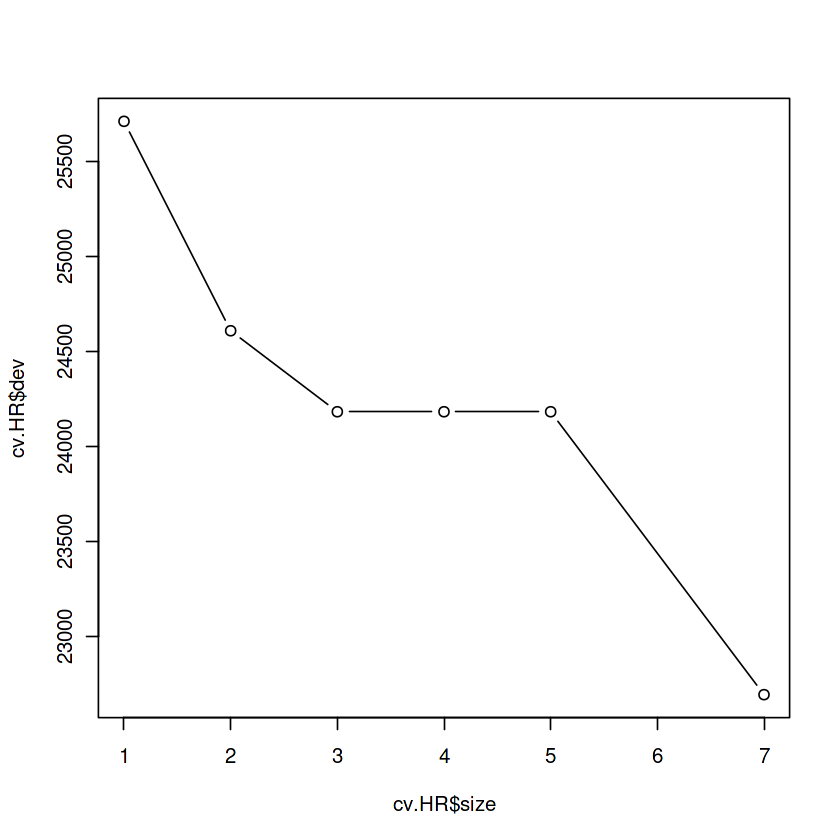

[1] 1.363701

[1] 1.363701

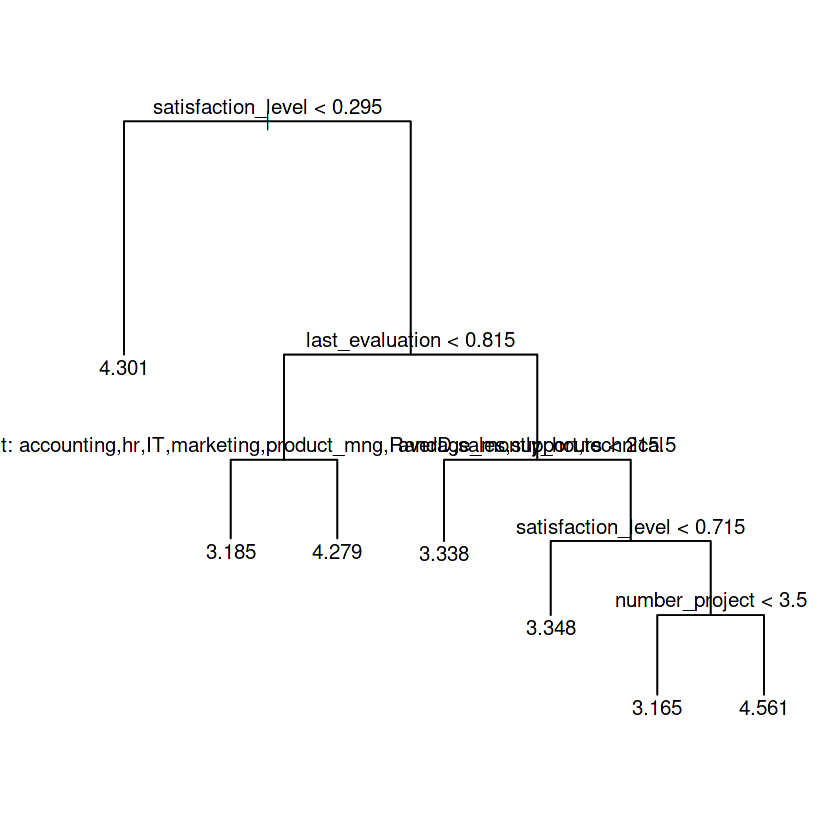

In [21]:
cv.HR = cv.tree(tree.HR)
plot(cv.HR$size, cv.HR$dev, type="b")

#Best Alpha value using CV to get lowest MSE=7
pruned.HR = prune.tree(tree.HR, best = 7)
par(mfrow = c(1, 1))
plot(pruned.HR)
text(pruned.HR, pretty = 0)

pred.pruned = predict(pruned.HR, HR.test)
MSE=mean((HR.test$time_spend_company - pred.pruned)^2)
RMSE=sqrt(MSE)
RMSE

# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,pred.pruned)



Test MSE after prune=1.47. Pruning the tree does not imporve the prediction accuracy in this HR dataset.

# Bagging Method

* Decision tree give high variance.
* In Bagging method, these trees are grown deep, and not pruned. 
* Averaging these trees reduces variance. 
* Therefore, our final prediction would have low variance and bias.
* However, it decreases the model interpretability because we have hundreds of trees instead of single tree.
* We need to use variable importance plot to see the importance of each predictor.

In [22]:
set.seed(1)
bag.HR = randomForest(time_spend_company~satisfaction_level+last_evaluation+number_project+average_montly_hours+Work_accident+promotion_last_5years+salary+department, data=HR.train, mtry = 8, ntree = 100, importance=TRUE)
bag.pred = predict(bag.HR, HR.test)
MSE=mean((HR.test$time_spend_company - bag.pred)^2)
RMSE_Bagging=sqrt(MSE)
RMSE_Bagging

# Another way to find RMSE using rmse()function available in Metics package
# Syntax: rmse(actual,predicted)
rmse(HR.test$time_spend_company,bag.pred)

importance(bag.HR)

[1] 1.082699

[1] 1.082699

,%IncMSE,IncNodePurity
satisfaction_level,76.84376,6316.9595
last_evaluation,65.69679,4492.9520
number_project,43.94218,1845.6448
average_montly_hours,69.10967,6000.9799
Work_accident,18.17915,611.4004
promotion_last_5years,18.61245,330.4119
salary,29.85650,1230.7589
department,46.07700,3000.4813


* Our prediction is 1.1 years away from the test value.
* From the variable importance() table,all the variables are important for predicting how many years employees would stay with the company. 

# Comparison of the model

MODEL,RMSE
<chr>,<dbl>
Linear_Regressin,1.450
Ridge_Regression,1.450
Lasso_Regression,1.450
Regression_Tree,1.417
Bagging,1.100


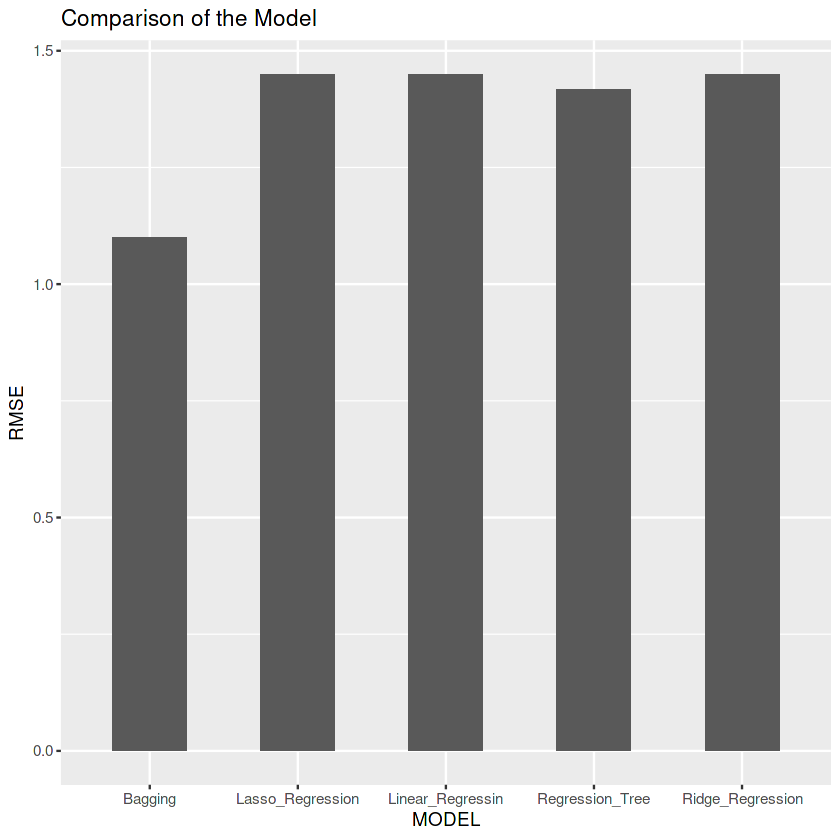

In [23]:
# Create a comparison table
Model.Compare=data.frame(
MODEL=c("Linear_Regressin","Ridge_Regression","Lasso_Regression","Regression_Tree","Bagging"),
RMSE=c(1.45,1.45,1.45,1.417,1.1))

Model.Compare

#Create a barplot
ggplot(data=Model.Compare,aes(x=MODEL,y=RMSE))+geom_bar(stat="identity",width=0.5)+ 
labs(title="Comparison of the Model")




# Conclusion

In conclusion, Bagging method is good for predicting how long the employees would stay with the company.